In [1]:
'''
surfplot_searchlight.ipynb
Fig3. visualizing individual searchlight models
Oct 2024 Jane
'''

In [2]:
# import
from neuromaps.datasets import fetch_fsaverage
from surfplot import Plot
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def draw_surfplot(model, save_f, color_range=(-.30,.30), views=None, cmap='inferno', threshold=0.005):
    surfaces = fetch_fsaverage(density='41k')
    lh, rh = surfaces['inflated']
    
    mask_rh = np.load('./cortical_mask_rh.npy')
    mask_lh = np.load('./cortical_mask_lh.npy')

    # surface of a model
    # from /backup/data/social_actions/fmri/pymvpa/
    # 'by' more conservative, using more standard 'bh' here
    sl_lh = nib.load(f'./sl_post_hha_results_1sided_bh_{model}_lh.gii').agg_data()
    sl_rh = nib.load(f'./sl_post_hha_results_1sided_bh_{model}_rh.gii').agg_data()

    mean_lh = sl_lh[0].copy() #use .copy()!
    mean_rh = sl_rh[0].copy()

    # Remove and clean up the medial wall
    mean_lh[~mask_lh] = np.nan
    mean_rh[~mask_rh] = np.nan
    
    if threshold: 
        # statistical thresholding -> p_value
        mean_lh[sl_lh[2] > threshold] = np.nan
        mean_rh[sl_rh[2] > threshold] = np.nan
    else: 
        # arbitrary mean thresholding -> r_value
        mean_lh[sl_lh[0] < threshold] = np.nan
        mean_rh[sl_rh[0] < threshold] = np.nan

    p = Plot(surf_lh=lh, surf_rh=rh, views=views, brightness=0.7, zoom=1.58, size=(500, 375))
    p.add_layer({'left': mean_lh, 'right': mean_rh}, cmap=cmap,
                color_range=color_range)
    
    cbar_kws = dict(location='right', draw_border=False, aspect=10,
                    shrink=.3, decimals=3, pad=0)
    fig = p.build(scale=(3, 3), cbar_kws=cbar_kws)
    
    print(f'{model}: max={np.nanmax(np.concatenate((mean_lh, mean_rh)))} min={np.nanmin(np.concatenate((mean_lh, mean_rh)))}')
    print(f'*thresholded with p = {threshold}')
    
    # save fig
    plt.savefig(save_f, dpi=300, transparent=True, bbox_inches='tight')
    print(f'saved {save_f}')

transitivity: max=0.4314156770706177 min=0.008721555583178997
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_transitivity_thesh0.001_lm.png


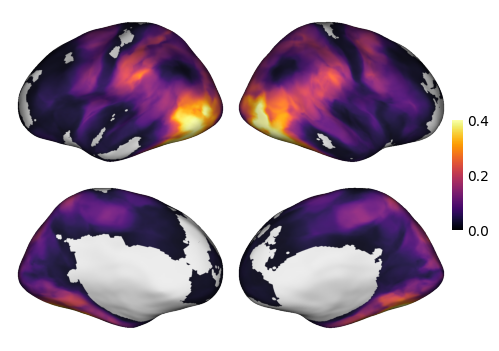

In [65]:
model = 'transitivity'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_lm.png'
draw_surfplot(model, save_f, color_range=(0, .4), threshold=threshold)

transitivity: max=0.4314156770706177 min=0.008721555583178997
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_transitivity_thesh0.001_v.png


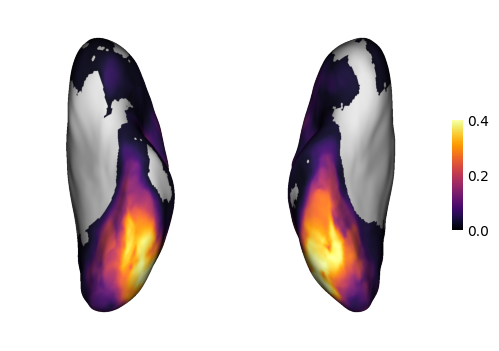

In [32]:
model = 'transitivity'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_v.png'
draw_surfplot(model, save_f, color_range=(0, .4), views='ventral', threshold=threshold)

sociality: max=0.4045574963092804 min=0.007985112257301807
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_sociality_thesh0.001_lm.png


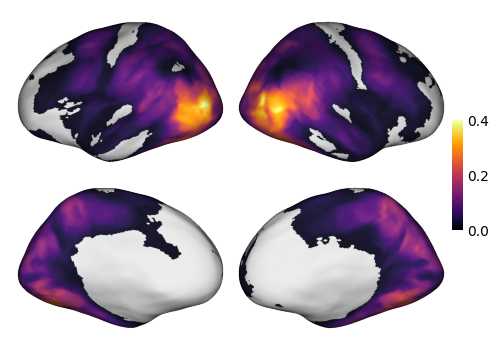

In [33]:
model = 'sociality'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_lm.png'
draw_surfplot(model, save_f, color_range=(0, .4), threshold=threshold)

sociality: max=0.4045574963092804 min=0.007985112257301807
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_sociality_thesh0.001_v.png


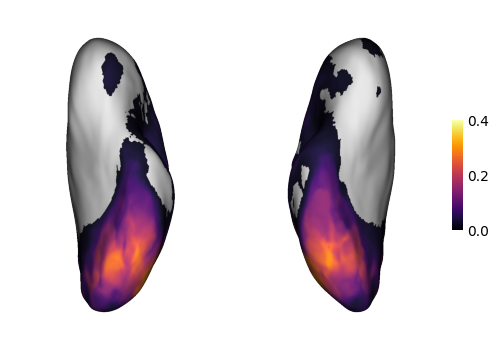

In [34]:
model = 'sociality'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_v.png'
draw_surfplot(model, save_f, color_range=(0, .4), views='ventral', threshold=threshold)

object: max=0.27986621856689453 min=0.0076528750360012054
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_object_thesh0.001_lm.png


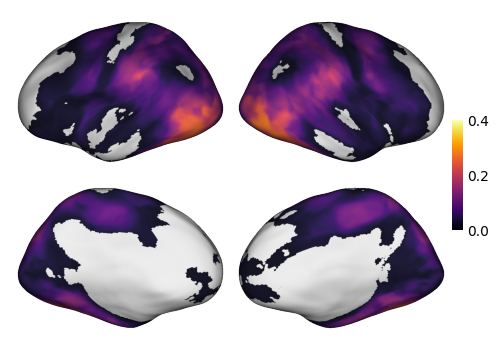

In [36]:
model = 'object'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_lm.png'
draw_surfplot(model, save_f, color_range=(0, .4), threshold=threshold)

object: max=0.27986621856689453 min=0.0076528750360012054
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_object_thesh0.001_v.png


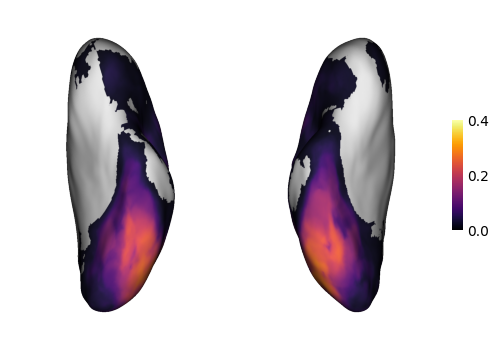

In [35]:
model = 'object'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_v.png'
draw_surfplot(model, save_f, color_range=(0, .4), views='ventral', threshold=threshold)

person: max=0.21222253143787384 min=0.008428874425590038
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_person_thesh0.001_lm.png


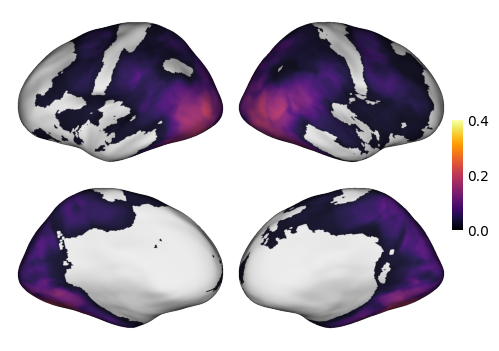

In [37]:
model = 'person'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_lm.png'
draw_surfplot(model, save_f, color_range=(0, .4), threshold=threshold)

person: max=0.21222253143787384 min=0.008428874425590038
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_person_thesh0.001_v.png


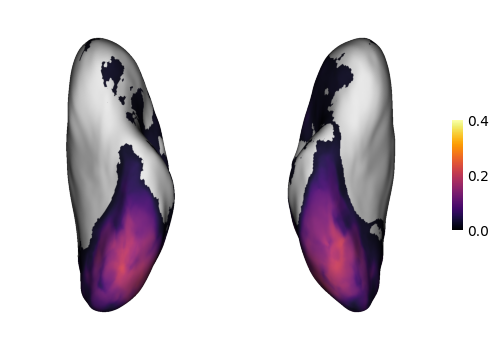

In [42]:
model = 'person'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_v.png'
draw_surfplot(model, save_f, color_range=(0, .4), views='ventral', threshold=threshold)

scene: max=0.2316357046365738 min=0.006437534000724554
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_scene_thesh0.001_lm.png


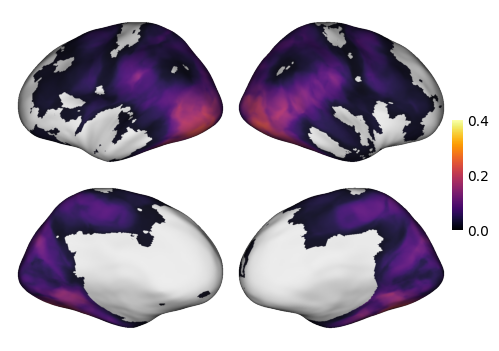

In [38]:
model = 'scene'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_lm.png'
draw_surfplot(model, save_f, color_range=(0, .4), threshold=threshold)

scene: max=0.2316357046365738 min=0.006437534000724554
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_scene_thesh0.001_v.png


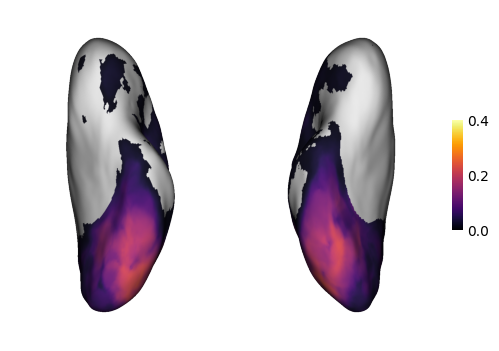

In [43]:
model = 'scene'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_v.png'
draw_surfplot(model, save_f, color_range=(0, .4), views='ventral', threshold=threshold)

verbs: max=0.2512461543083191 min=0.005678415298461914
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_verbs_thesh0.001_lm.png


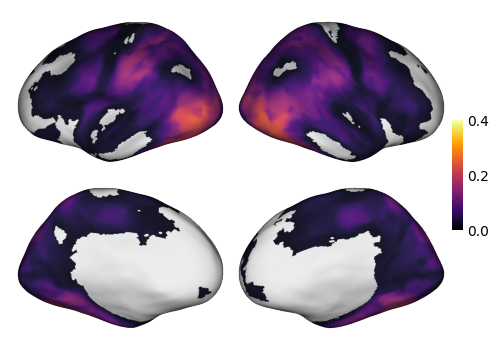

In [39]:
model = 'verbs'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_lm.png'
draw_surfplot(model, save_f, color_range=(0, .4), threshold=threshold)

verbs: max=0.2512461543083191 min=0.005678415298461914
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_verbs_thesh0.001_v.png


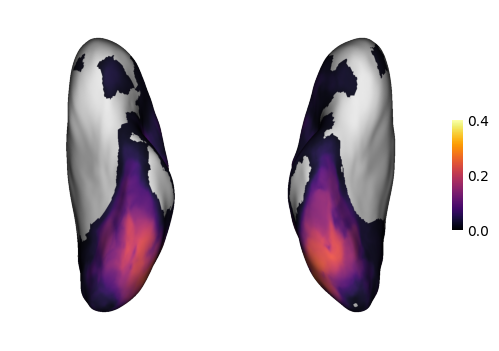

In [40]:
model = 'verbs'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_v.png'
draw_surfplot(model, save_f, color_range=(0, .4), views='ventral', threshold=threshold)

nonverbs: max=0.11296582967042923 min=0.005813051480799913
*thresholded with p = 0.005
saved ./plot/sl_1sided_by_nonverbs_thesh0.005_lm.png


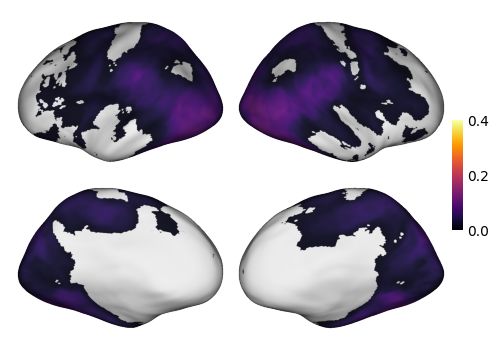

In [12]:
model = 'nonverbs'
threshold = 0.005
save_f = f'./plot/sl_1sided_by_{model}_thesh{threshold}_lm.png'
draw_surfplot(model, save_f, color_range=(0, .4), threshold=threshold)

nonverbs: max=0.11296582967042923 min=0.005364918150007725
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_nonverbs_thesh0.001_lm.png


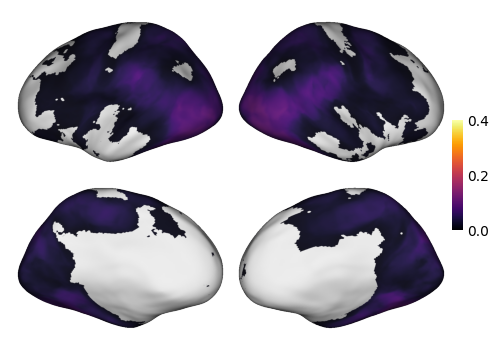

In [31]:
model = 'nonverbs'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_lm.png'
draw_surfplot(model, save_f, color_range=(0, .4), threshold=threshold)

nonverbs: max=0.11296582967042923 min=0.005364918150007725
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_nonverbs_thesh0.001_v.png


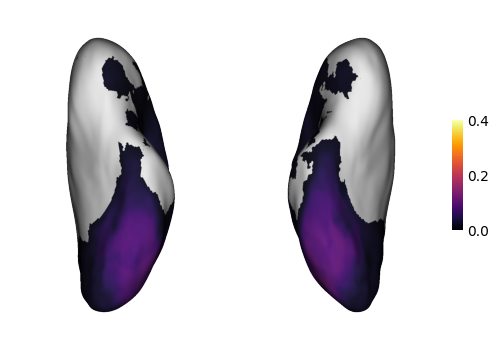

In [41]:
model = 'nonverbs'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_v.png'
draw_surfplot(model, save_f, color_range=(0, .4), views='ventral', threshold=threshold)

nonverbs: max=0.11296582967042923 min=0.005364918150007725
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_nonverbs_thesh0.001_v.png


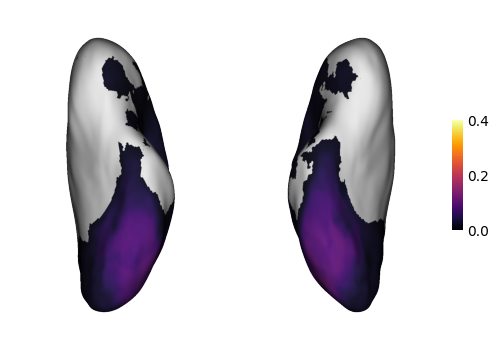

In [30]:
model = 'nonverbs'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_v.png'
draw_surfplot(model, save_f, color_range=(0, .4), views='ventral', threshold=threshold)

motion: max=0.2478111982345581 min=0.0059692529030144215
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_motion_thesh0.001_lm.png


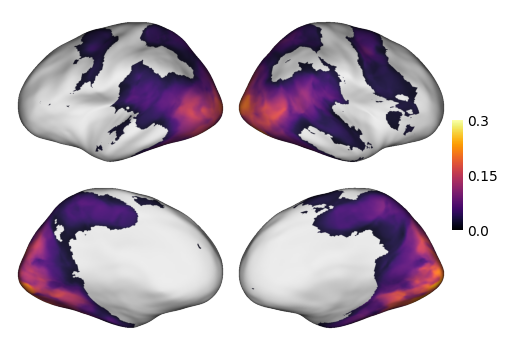

In [10]:
model = 'motion'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_lm.png'
draw_surfplot(model, save_f, color_range=(0, .3), threshold=threshold)

motion: max=0.2478111982345581 min=0.0059692529030144215
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_motion_thesh0.001_v.png


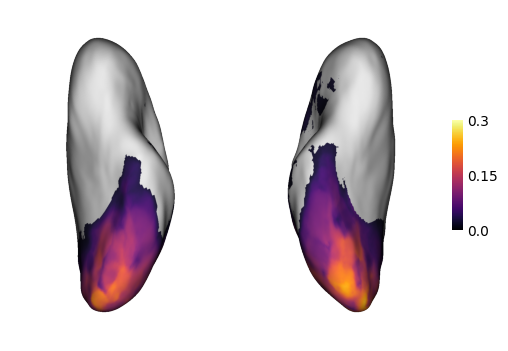

In [11]:
model = 'motion'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_v.png'
draw_surfplot(model, save_f, color_range=(0, .3), views='ventral', threshold=threshold)

gaze: max=0.17454363405704498 min=0.004445063881576061
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_gaze_thesh0.001_lm.png


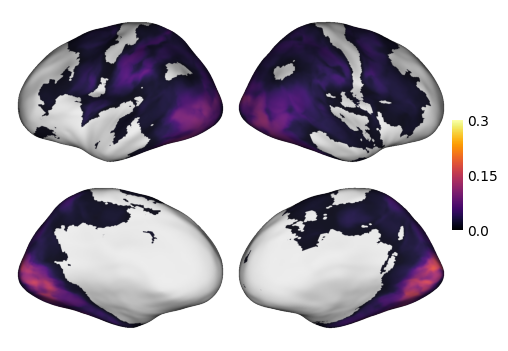

In [7]:
model = 'gaze'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_lm.png'
draw_surfplot(model, save_f, color_range=(0, .3), threshold=threshold)

gaze: max=0.17454363405704498 min=0.004445063881576061
*thresholded with p = 0.001
saved ./plot/sl_1sided_bh_gaze_thesh0.001_v.png


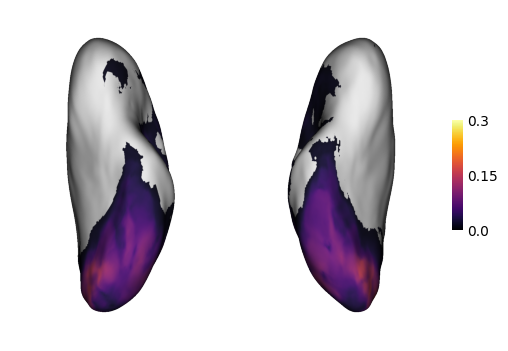

In [8]:
model = 'gaze'
threshold = 0.001
save_f = f'./plot/sl_1sided_bh_{model}_thesh{threshold}_v.png'
draw_surfplot(model, save_f, color_range=(0, .3), views='ventral', threshold=threshold)